<a href="https://colab.research.google.com/github/sirischuck/HW1/blob/main/HW1_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

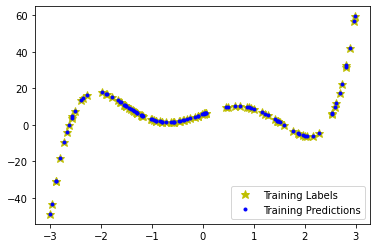

The MSE over the training data is 2.747798860642571e-26


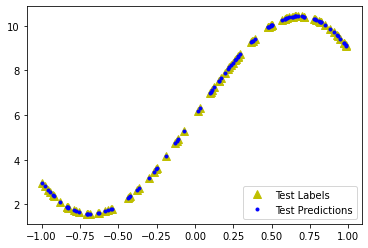

The MSE over the test data is 3.235585380752034e-26


In [140]:
import numpy as np
import time
import matplotlib.pyplot as plt



x_train= np.load('/content/drive/MyDrive/x_train.npy')
y_train= np.load('/content/drive/MyDrive/y_train.npy')



#passes the training data through the basis functions x,x^2...x^5
xTrainBasis = np.array([[x**i for i in range(0,6)] for x in x_train[:,0]])


#calulate the transpose once and save it because it's used twice for the normal equation
xTrainBasisT=np.transpose(xTrainBasis)

#big ugly normal equation written out in python
theta= np.dot(np.dot(np.linalg.inv(np.dot(xTrainBasisT,xTrainBasis)),xTrainBasisT),y_train)

#calculates the prediction for the y test values based on the model
yTrainPred=np.dot(xTrainBasis,theta)

#plot the prediction and the actual test data
plt.plot(x_train,y_train, 'y*', markersize=9, label= 'Training Labels')
plt.plot(x_train,yTrainPred,'b.', label = 'Training Predictions')
plt.legend(loc='lower right')
plt.show()


#calculate and show the MSE between the training data and the model
error=0
for (yG,y) in zip(y_train,yTrainPred):
  error= error + (yG-y)**2
print('The MSE over the training data is', error/len(yTrainPred))


#load the test data
x_test=np.load('/content/drive/MyDrive/x_test.npy')
y_test=np.load('/content/drive/MyDrive/y_test.npy')


#generate the test predictions
yTestPred=np.array([np.polyval(np.flipud(theta), x) for x in x_test])

#plot the test predictions and actual test data
plt.plot(x_test,y_test,'y^', markersize=8, label='Test Labels')
plt.plot(x_test,yTestPred,'b.', label = 'Test Predictions')
plt.legend(loc='lower right')
plt.show()

#calculate the MSE between the training data and the model
error=0
for (y,yP) in zip(y_test,yTestPred):
  error= error + (yP-y)**2
print('The MSE over the test data is', error[0]/len(yTestPred))





 

Obviously The Relationship given is not a Linear relationship, and because there is only one feature, the natural way to express this relation is with basis transformations. The Basis functions that jumped out at me were the polynomials, in this case up to degree 5, because the function trends upwards over the range and has 4 obvious critical points where the derivative is zero. When I implemented this solution, one thing I forgot about for a lot of the process was the existence of the x^0 or the bias term. I was very confused as to why my model wasn't at all matching my data for a while before I added the bias term, and then the model fit almost perfectly. In the real world, the error range I got over the training and test data would probably be a sign of highly over fitting or incomplete data, but because this is in an academic setting I think I just found the basis functions that you used.

In [165]:
import numpy as np
import csv
import matplotlib.pyplot as plt

with open("Assignment1_Q2_Data.csv", 'r') as file:

  csvreader = csv.reader(file)
  categories=next(csvreader)
  
  i=0
  houseDataTrain=[]
  houseDataTest=[]
  priceDataTrain=[]
  priceDataTest=[]
  
  for row in csvreader:

    houseToAppend=[float(elm) for elm in row[1:-1]]
    priceToAppend=[float(row[-1])]
    houseToAppend.append(float(1))

    if(i%6!=0):
      houseDataTrain.append(houseToAppend)
      priceDataTrain.append(priceToAppend)
    else:
      houseDataTest.append(houseToAppend)
      priceDataTest.append(priceToAppend)

    i+=1

  houseDataTrain=np.array(houseDataTrain)
  priceDataTrain=np.array(priceDataTrain)
  houseDataTest=np.array(houseDataTest)
  priceDataTest=np.array(priceDataTest)
  

  #calulate the transpose once and save it because it's used twice for the normal equation
  houseDataTrainT=np.transpose(houseDataTrain)

  #big ugly normal equation written out in python
  theta= np.dot(np.dot(np.linalg.inv(np.dot(houseDataTrainT,houseDataTrain)),houseDataTrainT),priceDataTrain)

  #calculates the prediction for the y test values based on the model
  priceTrainPred=np.dot(houseDataTrain,theta)

  avg=np.array([sum(houseDataTrain[:,i]) for i in range(len(houseDataTrain[0]))])
  avg=avg/len(houseDataTrain)
  
  
  
  squareError=0
  percentError=0



  for (y,yP) in zip(priceDataTrain,priceTrainPred):
    squareError= squareError + ((yP-y)**2)
    percentError= percentError+ abs((yP-y)/y)

  print('The mean Square error for the training data is', (squareError/len(priceDataTrain))[0])
  print('The mean Percentage error for the training data is', (percentError/len(priceDataTrain))[0]*100,'%')


  squareError=0
  percentError=0




  priceTestPred=np.dot(houseDataTest,theta)


  for (y,yP) in zip(priceDataTest,priceTestPred):
    squareError= squareError + ((yP-y)**2)
    percentError= percentError+ abs((yP-y)/y)

  print('The Mean Square error for the test data is', (squareError/len(priceDataTrain))[0])
  print('The Mean Percentage error for the test data is', (percentError/len(priceDataTrain))[0]*100,'%')

  importance =np.multiply(theta.T,avg)

  for (i,cat) in zip(importance.T[:-1],categories[1:-1]):
    print('The average effect of' , cat, 'on the house price was', i[0])


The mean Square error for the training data is 8.726097107657637
The mean Percentage error for the training data is 6.719407162524515 %
The Mean Square error for the test data is 4.066317939119264
The Mean Percentage error for the test data is 2.330476647123926 %
The average effect of Local Price on the house price was 4.4303088956928
The average effect of Bathrooms on the house price was 9.666789224914487
The average effect of Land Area on the house price was 2.3762773667756947
The average effect of Living area on the house price was 22.8244794310926
The average effect of # Garages on the house price was 3.6239908486745005
The average effect of # Rooms on the house price was -3.2632167063667112
The average effect of # Bedrooms on the house price was -2.9558211801623724
The average effect of Age of home on the house price was -1.7061254059582192
The average effect of Construction type on the house price was 2.175433360005153
The average effect of Architecture type on the house price wa

For this Section I took every 6th element from the training data and used it as a test set. The average least square error is given in the output for the code segment.

The most important feature in determining the final price of the house was seemingly the living area. I calculated this by take the average value of the living area and multipling it by its corresponding weight in theta. This gives the average ammount that the feature contributes to the overall price. 

Using the same methodology I found that architecture type was the least important because it had the lowest absolute value.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math

def weightMat(point, X): 
    
  weights= np.eye(len(X))
  for i in range(len(X)):
    weights[i][i]=

    

x_train= np.load('x_train.npy')
y_train= np.load('y_train.npy')



#load the test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')


x_train_biased=np.append(x_train,np.ones((len(x_train),1)),axis=1)
x_test_biased=np.append(x_test,np.ones((len(x_test),1)),axis=1)

x_train_trans=np.transpose(x_train_biased)

y_test_pred=[]

for querry in x_test_biased:
  weights=weightMat(querry,x_train_biased)

  

  theta = np.linalg.inv(np.dot(np.dot(x_train_biased.T,weights),x_train_biased))

  theta3=np.dot(weights,y_train)

  theta2=np.dot(x_train_biased.T,theta3)

  theta = np.dot(theta,theta2)


  y_test_pred.append(np.dot(theta,querry))



print(np.array(y_test_pred).shape)

plt.plot(x_test,y_test_pred,'*')

plt.plot(x_test,y_test,'*')

plt.show()


  








ValueError: ignored

You do not need any basis functions when using a locally weighted approach

In this implementation the values of theta have to be re calculated for every time the model is used.